# Раздел 6. Уравнения с частными производными параболического типа.
## Лабораторная работа №6. Методы решения квазилинейного уравнения теплопроводности.
### Вариант 2 Задание 5
_Яромир Водзяновский_

Дифференциальная задача

$$\frac{\partial u}{\partial t} = \frac{\partial}{\partial x} \left( u^{1/3} \frac{\partial u}{\partial x} \right) + \frac{\partial}{\partial y} \left( u^{1/3} \frac{\partial u}{\partial y} \right), \;\;\; 0 < t\leq 1, \; 0 < x,y <1    $$
$$u(0,x,y) = (1+x+y)^6 / 27000, \; 0 \leq x,y \leq 1  $$
$$u(t,0,y) = (1+y)^6 / (30-28t)^3, \; 0 < t \leq 1, \; 0 \leq y \leq 1  $$
$$u(t,1,y) = (2+y)^6/(30-28t)^3, \; 0 < t \leq 1, \; 0 \leq y \leq 1   $$
$$u(t,x,0) = (1+x)^6 /(30-28t)^3, \; 0 < t \leq 1, \; 0 < x < 1    $$
$$u(t,x,1) = (2+x)^6 /(30-28t)^3, \; 0 < t \leq 1, \; 0 < x < 1    $$
Решение в виде: 
$$u = (C_z + x + y)^{2/\mu} \left[ C_t - \frac{4 (\mu +2)}{\mu}t \right]^{-1/\mu} $$

Для нашей задачи:
$$C_t = 30, \; C_z = 1,\; \mu = \frac{1}{3}$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def anal(t,x,y):
    return (C_z + x + y)**(2/nu)*(C_t - 4*t*(nu+2)/nu)**(-1/nu)

In [4]:
def U_anal(x,y,t):   

    t_a = []
    for i in range(N):
        for j in range((L)*(K)):
            t_a.append(t[i])

    y_ar = []
    y_a = np.array([])
    for i in range(K):
        for j in range(L):
            y_ar.append(y[i])
    y_ar = np.array(y_ar)
    for n in range(N):
        y_a = np.concatenate((y_a,y_ar))

    x_a = np.array([])
    for i in range((K)*(N)):
        x_a = np.concatenate((x_a,x))

    U_an = np.vectorize(anal)(x_a,y_a,t_a).reshape(N,L,K)
    return U_an

In [36]:
def run(U_t, U_t_next, L, M, N):
    U_k = U_t
    u_next = np.empty(shape=(L,M))

    max_diff = eps + 1

    while max_diff > eps:
        u_next = np.empty(shape=(L,M))
        u_next[ : , 0] = U_t_next[: , 0]
        u_next[ : , -1] = U_t_next[: , -1]
        u_next[ 0 , :] = U_t_next[0 , :]
        u_next[ -1 , :] = U_t_next[-1 , :]
        for m in range(1, M-1):
            a = np.array([-dt/(2*hx**2)*((U_k[l+1][m])**nu + (U_k[l][m])**nu) for l in range(1, L-1)])
            c = np.array([-dt/(2*hx**2)*((U_k[l-1][m])**nu + (U_k[l][m])**nu) for l in range(1, L-1)])
            b = -a-c+1
            d = U_t[1:-1, m]
            
            alpha = [-a[0] / b[0]]
            beta = [(d[0] - c[0] * U_t_next[0][m]) / b[0]]
            for l in range(1, L - 2):
                alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1])) #28
                beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))
            
            for l in range(L - 2, 0, -1):
                u_next[l][m] = alpha[l - 1] * u_next[l + 1][m] + beta[l - 1]

        for l in range(1, L-1):
            a = np.array([-dt/(2*hy**2)*((U_k[l][m+1])**nu + (U_k[l][m])**nu) for m in range(1, M-1)])
            c = np.array([-dt/(2*hy**2)*((U_k[l][m-1])**nu + (U_k[l][m])**nu) for m in range(1, M-1)])
            b = -a-c+1
            d = u_next[l, 1:-1]

            alpha = [-a[0] / b[0]]
            beta = [(d[0] - c[0] * U_t_next[l][0]) / b[0]]

            for l in range(1, M - 2):
                alpha.append(-a[l] / (b[l] + c[l]*alpha[l-1]))
                beta.append((d[l] - c[l]*beta[l-1]) / (b[l] + c[l]*alpha[l-1]))

            for m in range(M - 2, 0, -1):
                u_next[l][m] = alpha[m - 1] * u_next[l][m + 1] + beta[m - 1]

        max_diff = np.max(np.abs((u_next - U_k)[1:-1] / u_next[1:-1]))
        U_k = u_next
        
    return U_k

In [42]:
def double_grid(N1,L1,M1):
    
    max_dif = np.array([])
    
    for j in range(len(N1)):
        L, M, N = int(L1[j]), int(M1[j]), int(N1[j])
        xl, hx = np.linspace(0, 1, L, retstep=True)
        ym, hy = np.linspace(0, 1, M, retstep=True)
        tn, dt = np.linspace(0, 1, N, retstep=True)
        U = np.zeros(shape=(N, L, M))
        U[0] = (C_z + xl + ym)**(2/nu)*C_t**(-1/nu)
        for n in range(0, N):
            U[n, 0, :] = (C_z + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
            U[n, -1, :] = (C_z + 1 + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
            U[n, :, 0] = (C_z + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
            U[n, :, -1] = (C_z + 1 + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)

        for n, t in enumerate(tn[1:], 1):
            U[n] = run(U[n-1],U[n], L, M, N)
        u_a = anal(tn[-1], xl, ym[1])
        u = U[-1, :, 1]

        step_for_output = (L - 1) // 5

        numeric = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
        numeric.iloc[:, :] = U[-1, ::step_for_output, ::step_for_output]

        analitic = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
        a=0
        for i in range(0, L, step_for_output): #L=M
            analitic.iloc[:, a] = anal(1, xl[::step_for_output], ym[i])
            a = a + 1

        max_dif = np.concatenate((max_dif, [np.max(np.abs(numeric.to_numpy() - analitic.to_numpy()))]))
    
    return max_dif

In [6]:
C_z = 1
C_t = 30
nu = 1/3

###
delta = 0.0
eps = 0.0001
N = 6
L = 6
M = 6
###
xl, hx = np.linspace(0, 1, L, retstep=True)
ym, hy = np.linspace(0, 1, M, retstep=True)
tn, dt = np.linspace(0, 1, N, retstep=True)

# np.set_printoptions(formatter={'all':lambda x: np.format_float_scientific(x, precision = 2)})
pd.set_option('display.float_format', lambda x: '{:.3E}'.format(x))

In [7]:


U = np.zeros(shape=(N, L, M))
U[0] = (C_z + xl + ym)**(2/nu)*C_t**(-1/nu)
for n in range(0, N):
    U[n, 0, :] = (C_z + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, -1, :] = (C_z + 1 + ym)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, :, 0] = (C_z + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)
    U[n, :, -1] = (C_z + 1 + xl)**(2/nu)*(C_t - 4*(nu+2)*tn[n]/nu)**(-1/nu)

for n, t in enumerate(tn[1:], 1):
    U[n] = run(U[n-1],U[n], L, M, N)
u_a = anal(tn[-1], xl, ym[1])
u = U[-1, :, 1]

step_for_output = (L - 1) // 5

numeric = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
numeric.iloc[:, :] = U[-1, ::step_for_output, ::step_for_output]

analitic = pd.DataFrame(columns = ym[::step_for_output], index = xl[::step_for_output])
a=0
for i in range(0, L, step_for_output): #L=M
    analitic.iloc[:, a] = anal(1, xl[::step_for_output], ym[i])
    a = a + 1

difference = np.abs(numeric.to_numpy() - analitic.to_numpy())
dif =  pd.DataFrame(difference, columns = ym[::step_for_output], index = xl[::step_for_output])

max_dif = np.max(np.abs(numeric.to_numpy() - analitic.to_numpy()))
    
    

## Аналитическое

In [8]:
analitic

,0.000E+00,2.000E-01,4.000E-01,6.000E-01,8.000E-01,1.000E+00
0.000E+00,1.250E-01,3.732E-01,9.412E-01,2.097E+00,4.252E+00,8.000E+00
2.000E-01,3.732E-01,9.412E-01,2.097E+00,4.252E+00,8.000E+00,1.417E+01
4.000E-01,9.412E-01,2.097E+00,4.252E+00,8.000E+00,1.417E+01,2.389E+01
6.000E-01,2.097E+00,4.252E+00,8.000E+00,1.417E+01,2.389E+01,3.861E+01
8.000E-01,4.252E+00,8.000E+00,1.417E+01,2.389E+01,3.861E+01,6.024E+01
1.000E+00,8.000E+00,1.417E+01,2.389E+01,3.861E+01,6.024E+01,9.113E+01


## Численное

In [9]:
numeric

,0.000E+00,2.000E-01,4.000E-01,6.000E-01,8.000E-01,1.000E+00
0.000E+00,1.250E-01,3.732E-01,9.412E-01,2.097E+00,4.252E+00,8.000E+00
2.000E-01,3.732E-01,3.186E+00,5.714E+00,9.696E+00,1.579E+01,1.417E+01
4.000E-01,9.412E-01,5.482E+00,9.662E+00,1.609E+01,2.567E+01,2.389E+01
6.000E-01,2.097E+00,1.380E+01,2.163E+01,2.846E+01,3.420E+01,3.861E+01
8.000E-01,4.252E+00,1.054E+01,1.813E+01,2.987E+01,4.739E+01,6.024E+01
1.000E+00,8.000E+00,1.417E+01,2.389E+01,3.861E+01,6.024E+01,9.113E+01


## Разница

In [10]:
dif 

,0.000E+00,2.000E-01,4.000E-01,6.000E-01,8.000E-01,1.000E+00
0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00
2.000E-01,0.000E+00,2.245E+00,3.616E+00,5.444E+00,7.793E+00,0.000E+00
4.000E-01,0.000E+00,3.384E+00,5.411E+00,8.088E+00,1.149E+01,0.000E+00
6.000E-01,0.000E+00,9.553E+00,1.363E+01,1.429E+01,1.031E+01,0.000E+00
8.000E-01,0.000E+00,2.536E+00,3.955E+00,5.979E+00,8.776E+00,0.000E+00
1.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00,0.000E+00


## Максимальная разница

In [11]:
max_dif

14.288814007472396

In [ ]:
N1 = np.array([6, 12, 24, 48, 96, 192])
L1 = np.array([6, 12, 24, 48, 96, 192])
M1 = np.array([6, 12, 24, 48, 96, 192])

double = double_grid(N1,L1,M1)


## Исследование на последовательно удваеваемых сетках

In [58]:
drt = np.concatenate((double, N1)).reshape(2,len(N1)).T
pd.DataFrame(drt, columns = ['Ошибка', 'N, L, M'])

,Ошибка,"N, L, M"
0,1.429E+01,6.000E+00
1,8.477E-01,1.200E+01
2,1.859E+01,2.400E+01
3,3.855E+01,4.800E+01
4,3.560E+01,9.600E+01
5,5.840E+01,1.920E+02


## 3-х мерный график при t = 1, для сетки (6 * 6 * 6)

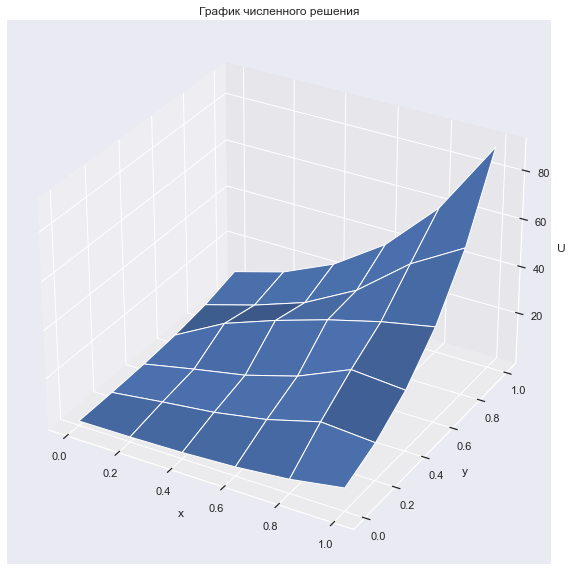

In [12]:
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
xgrid, ygrid = np.meshgrid(xl, ym)
ax.plot_surface(xgrid, ygrid, U[N-1])
ax.set_zlabel('U')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_title('График численного решения')
plt.show()